#  ***Proyecto 1 Flores Alonso Oscar David***



---



##Librerias

---



In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

#import seaborn as sns

## Lectura del archivo

---



In [2]:
## Lectura del archivo
df_original= pd.read_csv("forbes-dataset-2020.csv")
df_original.info()
## Se crea una copia
df= df_original.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


##Ajustes de formato

---



In [3]:
## Eliminamos la columna de indices
df.drop('S.NO',axis=1,inplace=True)

In [4]:
## Se cambia la columna time a un formato de fecha especifico
df['Year'] = df['Year'].apply(pd.to_datetime,format='%Y')
## Se pasa la columna year a una columna de indices

df['year'] = pd.DatetimeIndex(df['Year']).year  
df.set_index('year', inplace=True)
df.drop('Year',axis=1,inplace=True)

## Se cambia la columna Sport a mayusculas
#df1['Sport'] = df1['Sport'].str.upper()
## cambia la columna Sport a muinusculas
df['Sport'] = df['Sport'].str.lower()
## Se usa capitalize para iniciar con mayusculas
df['Sport'] =df['Sport'].str.capitalize()
## Se cambia al jugador con American football y baseball por solo American football
df['Sport']=df['Sport'].replace('American football / baseball','American football')
df.head(7)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,Boxing,28.6
1990,Buster Douglas,USA,2,NaN,Boxing,26.0
1990,Sugar Ray Leonard,USA,3,NaN,Boxing,13.0
1990,Ayrton Senna,Brazil,4,NaN,Auto racing,10.0
1990,Alain Prost,France,5,NaN,Auto racing,9.0
1990,Jack Nicklaus,USA,6,NaN,Golf,8.6
1990,Greg Norman,Australia,7,NaN,Golf,8.5


## 1 Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

---



In [5]:
## Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.
df1=df.copy()
## Se crea dataframe con datos mayores o iguales a 2010 y menores a 2020
initialyear=2010
finalyear=2020
df20102020 = df1[df1.index >= initialyear]
df20102020 = df20102020[df20102020.index <= finalyear]
## Se consideran solo las columnas necesarias
z2=df20102020[['Name','Current Rank',str('Previous Year Rank')]]
## Se hacen los respectivos filtros
## Se reemplaza el string >10 por 11 y se crea la columna Previous Rank2
z2['Previous Rank2']=z2['Previous Year Rank'].replace('>10','11')
## Se reemplazan los caracteres > ? por 20
z2['Previous Rank3']=z2['Previous Rank2'].str.replace('([>?])','20')
z2['Previous Rank35']=z2['Previous Rank3'].replace(np.nan,'22')
z2['Previous Rank355']=z2['Previous Rank35'].replace('not ranked','100')
z2['Previous Rank4']=z2['Previous Rank355'].replace('none','100')
## Cambiamos a entero
z2['Previous Rank4']=z2['Previous Rank4'].astype(int)
## Se borran las columnas extra 
#z2=z2.drop(['Previous Rank3', 'Previous Rank2', 'Previous Year Rank'], axis=1)
## Se localizan y sustituyen todos los valores mayores a 11 por 12
z2.loc[z2['Previous Rank4']>11,'Previous Rank4']=12
## Se crea la columna dif
z2['dif']=z2['Previous Rank4']-z2['Current Rank']
## Se da una condicion de falso o verdadero para filtrar datos
z2.loc[z2['dif']>1,'ascenso']=True
z2.loc[z2['dif']<2,'ascenso']=False
## Se filtran los atletas que ascendieron en cualquier periodo
atletas = z2[z2.ascenso == True]
## Se cuenta el total de ocasiones que aparece el atleta
ascensos_totales = atletas['Name'].value_counts().to_frame()
ascensos_totales.rename({'Name': 'Total de ascensos'}, axis=1, inplace=True)
ascensos_totales
z2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Current Rank,Previous Year Rank,Previous Rank2,Previous Rank3,Previous Rank35,Previous Rank355,Previous Rank4,dif,ascenso
year,,,,,,,,,,
2010,Tiger Woods,1,1,1,1,1,1,1,0,False
2010,Floyd Mayweather,2,>10,11,11,11,11,11,9,True
2010,Kobe Bryant,3,2,2,2,2,2,2,-1,False
2010,Phil Mickelson,4,6,6,6,6,6,6,2,True
2010,David Beckham,5,5,5,5,5,5,5,0,False
...,...,...,...,...,...,...,...,...,...,...
2020,Stephen Curry,6,9,9,9,9,9,9,3,True
2020,Kevin Durant,7,10,10,10,10,10,10,3,True
2020,Tiger Woods,8,11,11,11,11,11,11,3,True


## 2 Atleta con el menor número de apariciones y mayores ganancias.

---



In [6]:
## Atleta con el menor número de apariciones y mayores ganancias.
df1=df.copy()
## Se cuentan las repeticiones da cada atleta y se guarda en un dataframe
atletas_totales = df1['Name'].value_counts().to_frame()
atletas_totales.rename({'Name': 'Total_de_apariciones'}, axis=1, inplace=True)
## Se obtiene valor minimo de apariciones en el conjunto de atletas
valor_minimo = atletas_totales['Total_de_apariciones'].min()
## Se filtran los atletas con menor apariciones
atletas_totales2=atletas_totales[atletas_totales.Total_de_apariciones == valor_minimo]
## Se filtran y se guardan los atletas en un dataframe
df_menos_aparecidos= df1[df1.Name.isin(atletas_totales2.index)]
## Se busca el valor numerico de la mayor ganancia
val_max_gan = df_menos_aparecidos['earnings ($ million)'].max()
## Se filtra y se guarda
atleta_men_may=df_menos_aparecidos[df_menos_aparecidos['earnings ($ million)']==val_max_gan ]
## Se pasa a lista y se imprime el resultado.
l_atletas = atleta_men_may['Name'].tolist()
l_ganancias = atleta_men_may['earnings ($ million)'].tolist()
print('  El atleta con el menor número de apariciones y mayores ganancias \nes' , l_atletas[0],'con ', l_ganancias[0], 'millones.')


  El atleta con el menor número de apariciones y mayores ganancias 
es Conor McGregor con  99.0 millones.


## 3 Deporte y pais con mayor numero de atletas no rankeados que entraron en la lista de atletas mejor pagados.

---



In [7]:
## Deporte y pais con mayor numero de atletas no rankeados que entraron en la lista de atletas mejor pagados.
df1= df.copy()
## Se consideran solo las columnas necesarias
z3=df1[['Name','Nationality', 'Sport',str('Previous Year Rank')]]
## Se hacen los respectivos ajustes mediante reemplazos 
z3['Previous Rank2']=z3['Previous Year Rank'].replace(['none','?','??',np.nan],'not ranked')
no_rankeados = z3[z3['Previous Rank2'] == 'not ranked']
## Se cuentan el numero de repeticiones de los no ranqueados por deporte
total_deportes = no_rankeados['Sport'].value_counts().to_frame()
total_deportes.rename({'Sport': 'Total_deportes'}, axis=1, inplace=True)
## Se cuentan el numero de repeticiones de los no ranqueados por pais
total_paises = no_rankeados['Nationality'].value_counts().to_frame()
total_paises.rename({'Nationality': 'Total_paises'}, axis=1, inplace=True)
## Se obtienen los maximos
valor_max_deportes = total_deportes['Total_deportes'].max()
valor_max_pais = total_paises['Total_paises'].max()
## Se obtienen los datos de los maximos
deportem=total_deportes[total_deportes.Total_deportes== valor_max_deportes]
paism=total_paises[total_paises.Total_paises== valor_max_pais]
## Listas de los paises con mayor numero de atletas
l_dep = deportem.index.tolist()
l_pais=paism.index.tolist()

### Se obtendran deporte y pais con mayor numero de atletas no rankeados considerando pais y deporte anteriores
td=no_rankeados[no_rankeados.Sport== l_dep[0]]
tp=no_rankeados[no_rankeados.Nationality== l_pais[0]]
## Dados los resultados anteriores se obtienen los totales
totp_dado_d = td['Nationality'].value_counts().to_frame()
totp_dado_d.rename({'Nationality': 'Total_paises_dado_deporte'}, axis=1, inplace=True)
totd_dado_p = td['Sport'].value_counts().to_frame()
totd_dado_p.rename({'Sport': 'Total_deportes_dado_pais'}, axis=1, inplace=True)
l_pais2=totp_dado_d.index.tolist()
l_dep2 =totd_dado_p.index.tolist()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###Resultados

In [8]:
## Se imprimen los resultados
print('\n  El deporte con mayor numero de atletas no rankeados es', l_dep[0])
print('  Dado que el deporte con mayor numero de atletas no rankeados es' , l_dep[0] ,'entonces tenemos que el pais es', l_pais2[0] )
print('\n  El pais con mayor numero de atletas no rankeados es', l_pais[0])
print('  Dado que el pais con mayor numero de atletas no rankeados es' , l_pais[0] ,'entonces tenemos que el deporte es', l_dep2[0],'\n' )


  El deporte con mayor numero de atletas no rankeados es Boxing
  Dado que el deporte con mayor numero de atletas no rankeados es Boxing entonces tenemos que el pais es USA

  El pais con mayor numero de atletas no rankeados es USA
  Dado que el pais con mayor numero de atletas no rankeados es USA entonces tenemos que el deporte es Boxing 



## 4 País con mayor número de deportes con atletas en el dataset.

---



In [9]:
## País con mayor número de deportes con atletas en el dataset.

df1= df.copy()
## Se usa pivot_table de Numpy para saber en cuantas ocaciones coincide el pais con el depote
gantot=pd.pivot_table(df1, index=['Nationality','Sport'], values="earnings ($ million)", aggfunc=('count'))
gantot=gantot.reset_index()
## Se cuentan las coincidencias
total_paises = gantot['Nationality'].value_counts().to_frame()
total_paises


,Nationality
USA,12
Canada,4
Germany,3
UK,2
Brazil,2
Northern Ireland,1
Switzerland,1
Spain,1
Serbia,1
Russia,1


## 5 ¿Cuántos atletas por deporte tiene cada país?

---



In [10]:
## ¿Cuántos atletas por deporte tiene cada país?

df1= df.copy()
## Se usa pivot_table de Numpy para saber en cuantas ocaciones coincide atleta deporte y pais
nsn=pd.pivot_table(df1, index=['Nationality','Sport','Name'], values="earnings ($ million)", aggfunc=('count'))
## Se pasan indices a columnas
nsn=nsn.reset_index()
## Se concatenan para poder contar totales
nsn['Pais_Deporte'] = nsn['Nationality'].str.cat(nsn['Sport'], sep ="-")
total_paises = nsn['Pais_Deporte'].value_counts().to_frame()
total_paises=total_paises.reset_index()
## Se crea un dataframe con Pais y Deporte por separado
total_paises2=total_paises['index'].str.split('-',expand=True)
## Se concatena para obtener pais y deporte por separado
total_paises= pd.concat([total_paises, total_paises2], axis=1)
## Se renombra
total_paises=total_paises.rename(columns={'Pais_Deporte':'Atletas por deporte en cada pais',0:'Pais',1:'Deporte'})
total_paises=total_paises[['Pais','Deporte','Atletas por deporte en cada pais']]
total_paises


,Pais,Deporte,Atletas por deporte en cada pais
0,USA,American football,16
1,USA,Basketball,12
2,USA,Boxing,11
3,USA,Golf,6
4,USA,Tennis,3
5,USA,Baseball,3
6,USA,Nascar,2
7,Brazil,Soccer,2
8,USA,Auto racing (nascar),2
9,USA,Nfl,2


## 6 Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

---



In [11]:
### Ganancia mínima y máxima (dentro del dataset) por deporte y país.
df1=df.copy()
## Consideramos columnas de interes
df1=df1[['Name','Nationality', 'Sport','earnings ($ million)']]
## Se usa la funcion pivot_table de pandas para crear un data Frame agrupar y aplicar funciones deagregacion.
maxmin=pd.pivot_table(df1, index=['Nationality','Sport'],values="earnings ($ million)",aggfunc=('max',"min"),dropna=True)
## Cambiamos los indices a columnas
maxmin=maxmin.reset_index() 
maxmin


,Nationality,Sport,max,min
0,Argentina,Soccer,127.0,32.3
1,Australia,Golf,8.5,8.5
2,Austria,Auto racing,13.5,13.5
3,Brazil,Auto racing,22.0,10.0
4,Brazil,Soccer,105.0,31.0
5,Canada,Auto racing,23.0,20.0
6,Canada,Boxing,10.2,10.2
7,Canada,Hockey,17.9,17.9
8,Canada,Ice hockey,14.5,13.5
9,Dominican,Baseball,35.0,35.0


### Grafico



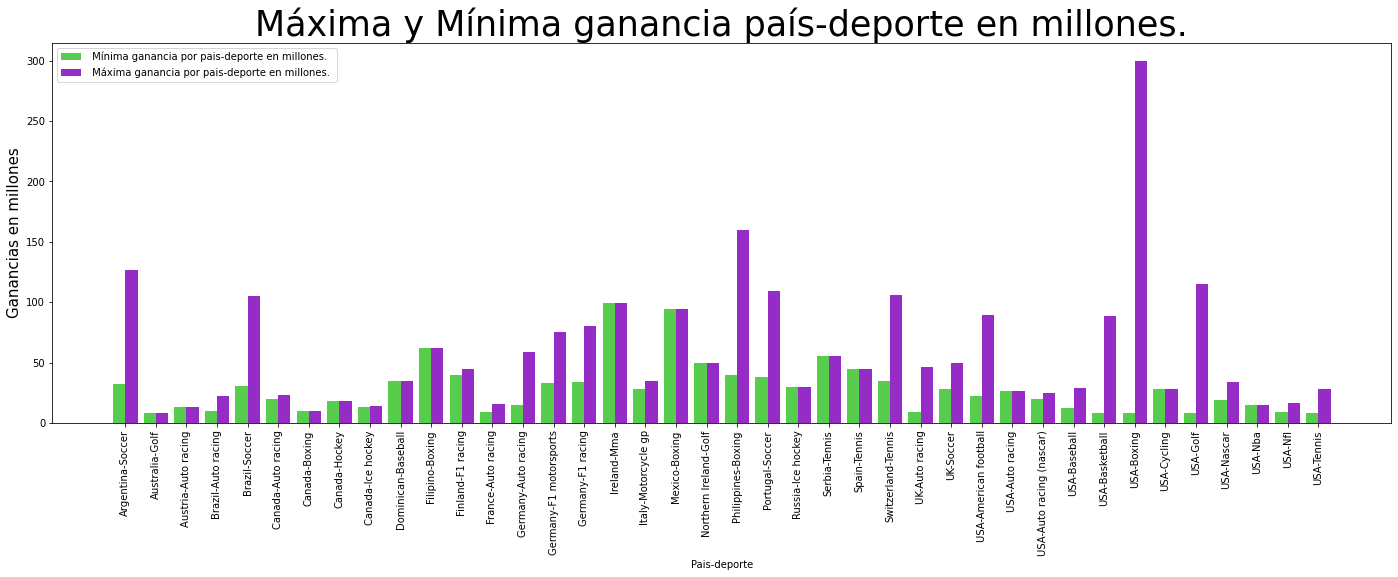

In [12]:
## Grafica de ganancia mínima y máxima por deporte y país.
## Se concatenen columnas
maxmin['Pais_Deporte'] = maxmin['Nationality'].str.cat(maxmin['Sport'], sep ="-")
## Se definen valores para los ejes x , y
x1 = maxmin['Pais_Deporte']
y1 = maxmin['min']
y2 = maxmin['max']
## Con la funcion arange de numpy se define la cantidad de valores en el eje x
ejex = np.arange(len(x1))
## Size
plt.figure(figsize=(24,7))
## Se crean las graicas definiendo el origen de cada barra y anchura
plt.bar(ejex - 0.2, y1, 0.4, label = ' Mínima ganancia por pais-deporte en millones. ',color='#57CC4D')
plt.bar(ejex + 0.2, y2, 0.4, label = ' Máxima ganancia por pais-deporte en millones. ',color='#962CC6')
plt.xticks(ejex, x1, rotation=90)
plt.xlabel("Pais-deporte",fontsize=10)
plt.ylabel("Ganancias en millones",fontsize=15)
plt.title("Máxima y Mínima ganancia país-deporte en millones.",fontsize=35)
plt.legend()
plt.show()


## 7 Atleta con mayores ganancias por deporte por década

---



In [13]:
## Atleta con mayores ganancias por deporte por década
df1=df.copy()
df1=df1[['Name', 'Sport','Nationality' ,"earnings ($ million)"]]
## Pasamos indice como columna
df1=df1.reset_index()
## Con esto cambiamos los años a su correspondiente decada
df1.year=(df1.year/10).apply(np.floor).astype(int)*10
## Se usara esto para que ningun valor en un futuro indice sea igual, de esa forma se podra cooncatenar sin problema
ch=np.arange(1,len(df1)+1,1)*.00001
## Se copia la columna de ganancias
df1["Ganancia_Maxima"]=df1["earnings ($ million)"]
## Se suman valores despreciables para la comparacion
df1["earnings ($ million)"]=df1["earnings ($ million)"]+ch
## Se usa pivot_table para hacer las comparaciones
maxgan=pd.pivot_table(df1, index=[ 'year','Sport'],values="earnings ($ million)",aggfunc=('max',"min"),dropna=True)
## Eliminamos indices
maxgan=maxgan.reset_index()
##Renombramos
maxgan=maxgan.rename(columns={'Sport': 'Sport2', 'year': 'year2','max':'max2','min':'min2'})
## Se cambia a string para poder concatenar y tener indices no repetidos
maxgan['max3']=maxgan.max2.astype(str)
maxgan['year2']=maxgan.year2.astype(str)
maxgan['sp_max'] = maxgan['Sport2'].str.cat(maxgan['max3'], sep ="-")
maxgan['sp_max'] = maxgan['sp_max'].str.cat(maxgan['year2'], sep ="-")
## Creamos los indices
maxgan.set_index(['sp_max'], inplace=True)
## Como en lo anterior se cambia a string para poder concatenar y tener indices no repetidos
df1['str_e']=df1['earnings ($ million)'].astype(str)
df1['year']=df1['year'].astype(str)
df1['sp_max2'] = df1['Sport'].str.cat(df1['str_e'], sep ="-")
df1['sp_max2'] = df1['sp_max2'].str.cat(df1['year'], sep ="-")
df1.set_index(['sp_max2'], inplace=True)
## Con los indices creados se concatenan los dataframe
dscon= pd.concat([df1, maxgan], axis=1)
## Eliminamos filas con NaN
dscon=dscon.dropna()
dscon=dscon.reset_index()
## Se consideran columnas de interes
dscon=dscon[['year', 'Name', 'Sport', 'Ganancia_Maxima']]
dscon=dscon.rename(columns={'year':'Decada'})
dscon

,Decada,Name,Sport,Ganancia_Maxima
0,1990,Shaquille O'Neal,Nba,15.2
1,1990,Deion Sanders,American football,22.5
2,1990,Andre Agassi,Tennis,16.0
3,1990,Mike Tyson,Boxing,75.0
4,1990,Emmit Smith,Nfl,16.5
5,1990,Michael Jordan,Basketball,78.3
6,1990,Joe Sakic,Hockey,17.9
7,1990,Michael Schumacher,F1 motorsports,38.0
8,1990,Sergei Federov,Ice hockey,29.8
9,1990,Dale Earnhardt,Nascar,24.1


### Grafico 1

Text(0, 0.5, 'Atleta')

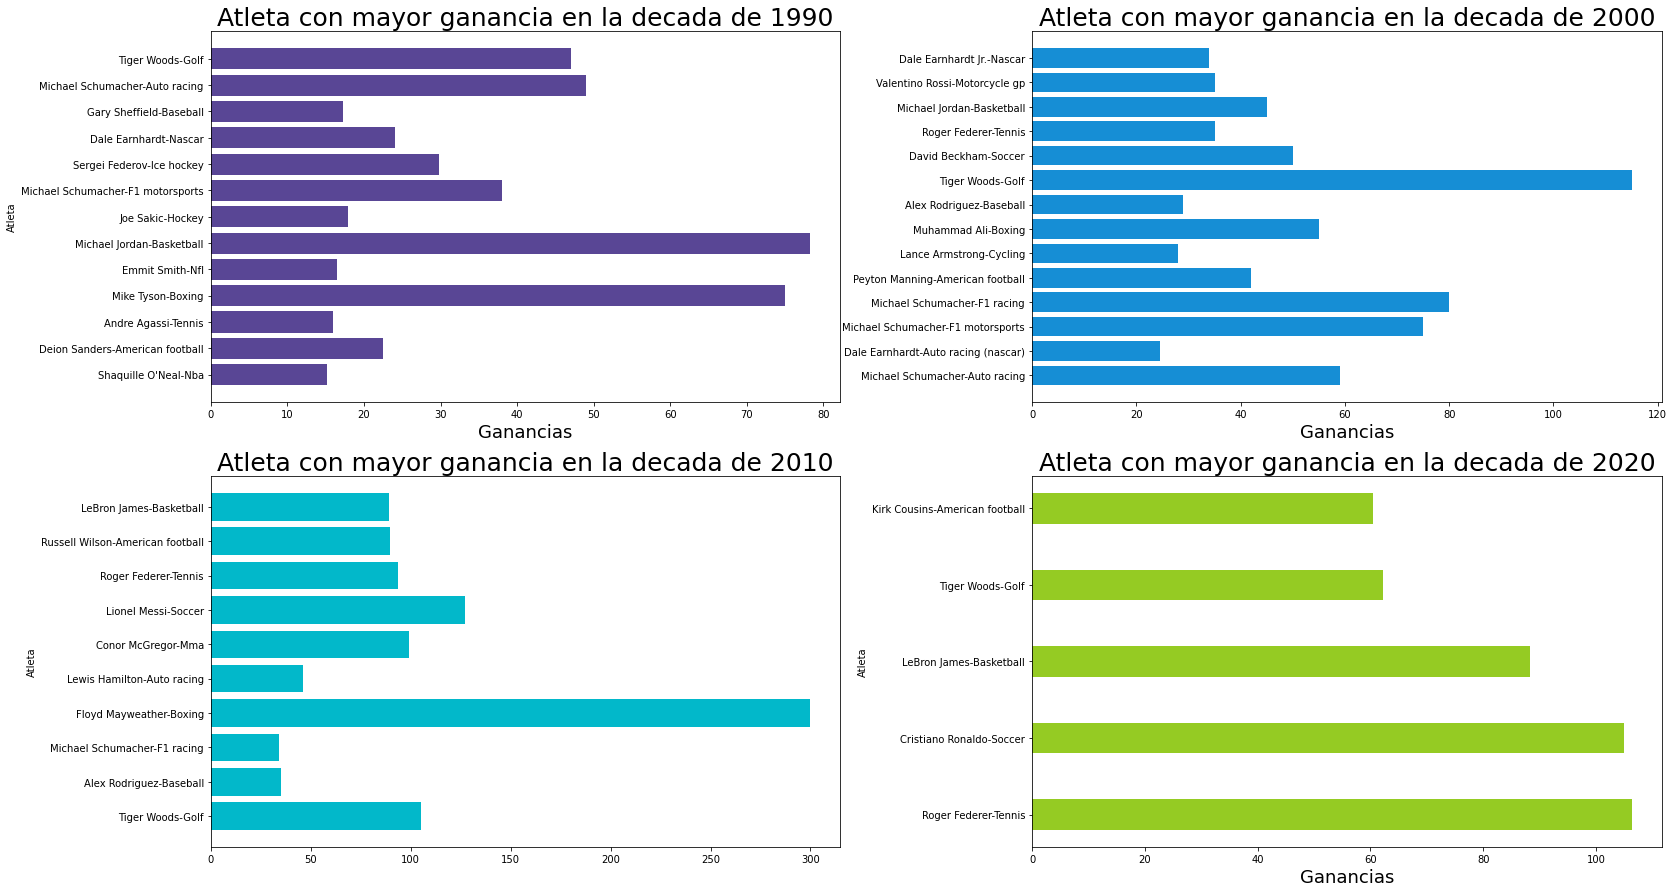

In [14]:
## Se graficaran los resultados por decada
dscon['nom_dep']=dscon['Name']+'-'+dscon['Sport']

maxgan_dec_sport1990 = dscon[dscon.Decada == "1990"]
maxgan_dec_sport2000 = dscon[dscon.Decada == "2000"]
maxgan_dec_sport2010 = dscon[dscon.Decada == "2010"]
maxgan_dec_sport2020 = dscon[dscon.Decada == "2020"]

## Graficas de barras horizontales
## Se hacen cuatro graficas en una figura
# Tamaño
fig,ax=plt.subplots(figsize=(26,15))
# Se crea una matriz en la imagen
ax = plt.subplot2grid((2,9), (0, 0))

# Posicion de la primer grafica y con colpan y rowspan se da la extencion de la grafica
ax1 = plt.subplot2grid((2,9), (0, 0), colspan=4,rowspan=1)
# Primer grafica de barras
plt.barh(maxgan_dec_sport1990["nom_dep"], maxgan_dec_sport1990["Ganancia_Maxima"],color='#594695')    
#5FC2A1
# Titulos
plt.title('Atleta con mayor ganancia en la decada de 1990',fontsize=25)
ax1.set_xlabel('Ganancias',fontsize=18, color='black')
ax1.set_ylabel('Atleta',rotation=90)

ax2 = plt.subplot2grid((2,9), (0,5), colspan=4,rowspan=1)
plt.barh(maxgan_dec_sport2000["nom_dep"], maxgan_dec_sport2000["Ganancia_Maxima"],color='#168ED5')    
plt.title('Atleta con mayor ganancia en la decada de 2000',fontsize=25)
ax2.set_xlabel('Ganancias',fontsize=18, color='black')
#ax2.set_ylabel('Atleta',rotation=90)

ax3 = plt.subplot2grid((2,9), (1,0), colspan=4,rowspan=1)
plt.barh(maxgan_dec_sport2010["nom_dep"], maxgan_dec_sport2010["Ganancia_Maxima"],color='#02B8CA')    
plt.title('Atleta con mayor ganancia en la decada de 2010',fontsize=25)
#ax3.set_xlabel('Ganancias',fontsize=18, color='black')
ax3.set_ylabel('Atleta',rotation=90)

ax4 = plt.subplot2grid((2,9), (1,5),colspan=4,rowspan=1)
plt.barh(maxgan_dec_sport2020["nom_dep"], maxgan_dec_sport2020["Ganancia_Maxima"],color='#95CB23',height=.4)    
plt.title('Atleta con mayor ganancia en la decada de 2020',fontsize=25)
ax4.set_xlabel('Ganancias',fontsize=18, color='black')
ax4.set_ylabel('Atleta',rotation=90)

### Grafico 2

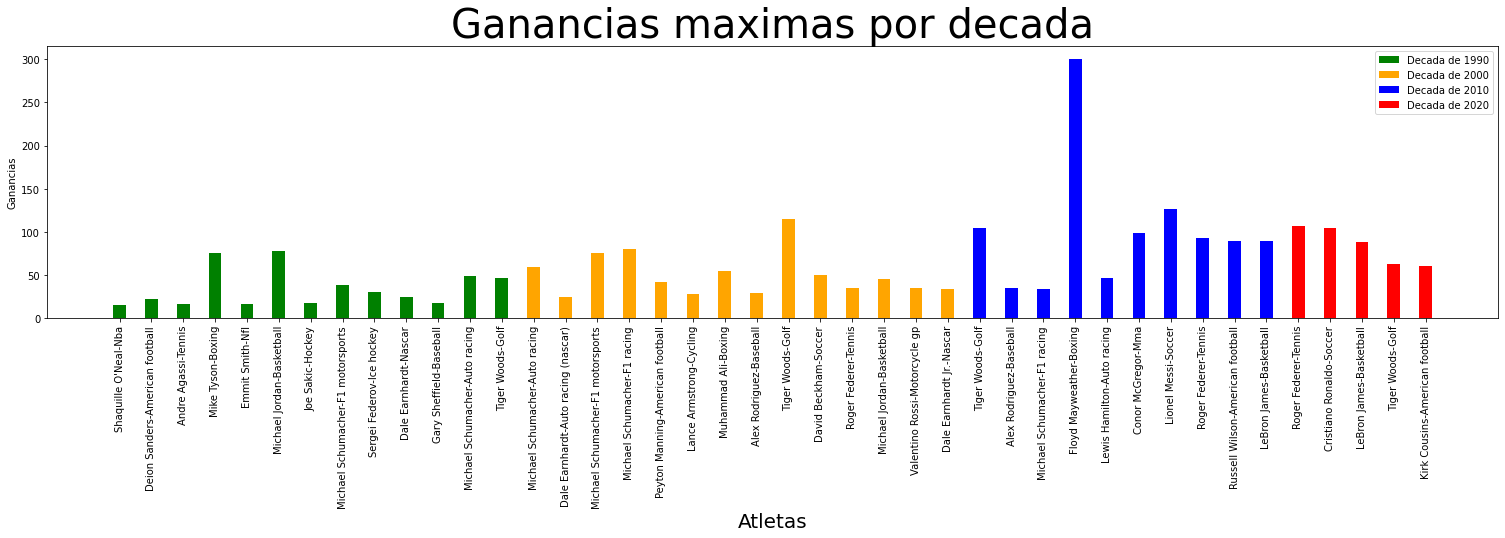

In [15]:
## En una misma grafica varias graficas verticales
## maxgan_dec_sport1990.plot(x="Nombre", y=["Ganancia ($ millones)"], kind="bar",figsize=(10,4))

## Se acomodan los datos en el data frame creando la columna a1990 a partir de una condicion
dscon.loc[dscon['Decada']=="1990",'a1990']=dscon['Ganancia_Maxima']
dscon.loc[dscon['Decada']!="1990",'a1990']=0

dscon.loc[dscon['Decada']=="2000",'a2000']=dscon['Ganancia_Maxima']
dscon.loc[dscon['Decada']!="2000",'a2000']=0

dscon.loc[dscon['Decada']=="2010",'a2010']=dscon['Ganancia_Maxima']
dscon.loc[dscon['Decada']!="2010",'a2010']=0

dscon.loc[dscon['Decada']=="2020",'a2020']=dscon['Ganancia_Maxima']
dscon.loc[dscon['Decada']!="2020",'a2020']=0

## Se concatenan dos columnas con separador
#gan_min_max['Deporte_en_pais'] = gan_min_max['País'].str.cat(gan_min_max['Deporte'], sep =" ")
dscon['nom_dep'] = dscon['Name'].str.cat(dscon['Sport'], sep ="-")
# Se guardan las columnas de interes en variables
nom_pais=dscon['nom_dep']
dec1990=dscon["a1990"]
dec2000=dscon["a2000"]
dec2010=dscon["a2010"]
dec2020=dscon["a2020"]
## Se crea un numpy array con los valores del eje x con la funcion arange de NumPy,
##   con valores de inicio y final especificando el incremento.
eje_x=np.arange(0,len(dscon),1)
## Se establece el tamaño
plt.figure(figsize=(26,5))
# Se definen las graficas de barras
plt.bar(eje_x + 0, dec1990, 0.4, label = 'Decada de 1990',color='green')
plt.bar(eje_x + 0, dec2000, 0.4, label = 'Decada de 2000',color='orange')
plt.bar(eje_x + 0, dec2010, 0.4, label = 'Decada de 2010',color='blue')
plt.bar(eje_x + 0, dec2020, 0.4, label = 'Decada de 2020',color='red')
# Titulos
plt.xticks(eje_x, nom_pais, rotation=90)
plt.xlabel("Atletas",fontsize=20)
plt.ylabel("Ganancias")
plt.title("Ganancias maximas por decada",fontsize=40)
plt.legend()
plt.show()

## 8 Ganancia total por cada deporte por cada año.

---




In [16]:
## Atleta con mayores ganancias por deporte por década
df1=df.copy()
df1=df1.reset_index()
## Se usa pivot_table de Numpy para hacer las sumas de los deportes con respecto a cada año
gantot=pd.pivot_table(df1, index=['Sport','year'], values='earnings ($ million)', aggfunc=('sum'))
gantot=gantot.rename(columns={'earnings ($ million)':'Ganancia_Total' })
gantot

Ganancia_Total
Sport             year                
American football 1995            22.5
                  2004            42.0
                  2005            37.5
                  2006            29.0
                  2010            78.2
...                                ...
Tennis            2016           123.6
                  2017            64.0
                  2018            77.2
                  2019            93.4
                  2020           106.3

[176 rows x 1 columns]